<div class="alert alert-block alert-success">
    <h1 align="center">Training a Model to Predict The Motion of a non-linear Pendulum</h1>
    <h3 align="center">Mahan Sattarpour</h3>
</div>

### Import libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt

## Prepare and Process Data

In [2]:
pendulum_data = pd.read_csv('pendulum_data.csv')  # Update with the correct path

X = pendulum_data[['Time', 'Theta0', 'Omega0', 'Length']]
y = pendulum_data['Y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pendulum_data

,Time,X,Y,Theta0,Omega0,Length
0,0.0,0.269526,0.709999,2.645552,-10.000000,0.748863
1,0.5,-0.446495,0.593090,2.645552,-10.000000,0.748863
2,1.0,-0.648200,0.322976,2.645552,-10.000000,0.748863
3,1.5,-0.487096,0.540829,2.645552,-10.000000,0.748863
4,2.0,0.647857,0.427623,2.645552,-10.000000,0.748863
...,...,...,...,...,...,...
2395,117.5,0.150110,-1.907139,1.653470,-7.894737,1.930401
2396,118.0,-1.305291,-1.350960,1.653470,-7.894737,1.930401
2397,118.5,-1.461181,-1.335342,1.653470,-7.894737,1.930401
2398,119.0,0.002217,-1.883306,1.653470,-7.894737,1.930401


## Gradient Boosting Regression Model

In [3]:
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)

y_pred_gbr = model_gbr.predict(X_test)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("R-squared for Gradient Boosting Regressor:", r2_gbr)

R-squared for Gradient Boosting Regressor: 0.40763067919018126


## Basic Neural Network Model

In [4]:
model_bnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1)
])
model_bnn.compile(optimizer='adam', loss='mean_squared_error')
model_bnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_bnn = model_bnn.predict(X_test_scaled).flatten()
r2_bnn = r2_score(y_test, y_pred_bnn)

print("R-squared for Basic Neural Network:", r2_bnn)

15/15 [==============================] - 0s 277us/step
R-squared for Basic Neural Network: 0.43630523308500246


## Deep Neural Network Model

In [5]:
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model_dnn.compile(optimizer='adam', loss='mean_squared_error')
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_dnn = model_dnn.predict(X_test_scaled).flatten()
r2_dnn = r2_score(y_test, y_pred_dnn)

print("R-squared for Deep Neural Network:", r2_dnn)

15/15 [==============================] - 0s 300us/step
R-squared for Deep Neural Network: 0.4417591619599588


## Recurrent Neural Network Model

In [6]:
model_rnn = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
X_train_scaled_rnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled_rnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
model_rnn.fit(X_train_scaled_rnn, y_train, epochs=10, batch_size=32, verbose=0)

y_pred_rnn = model_rnn.predict(X_test_scaled_rnn).flatten()
r2_rnn = r2_score(y_test, y_pred_rnn)

print("R-squared for Recurrent Neural Network:", r2_rnn)

15/15 [==============================] - 0s 316us/step
R-squared for Recurrent Neural Network: 0.4724689133464376


## Visualization

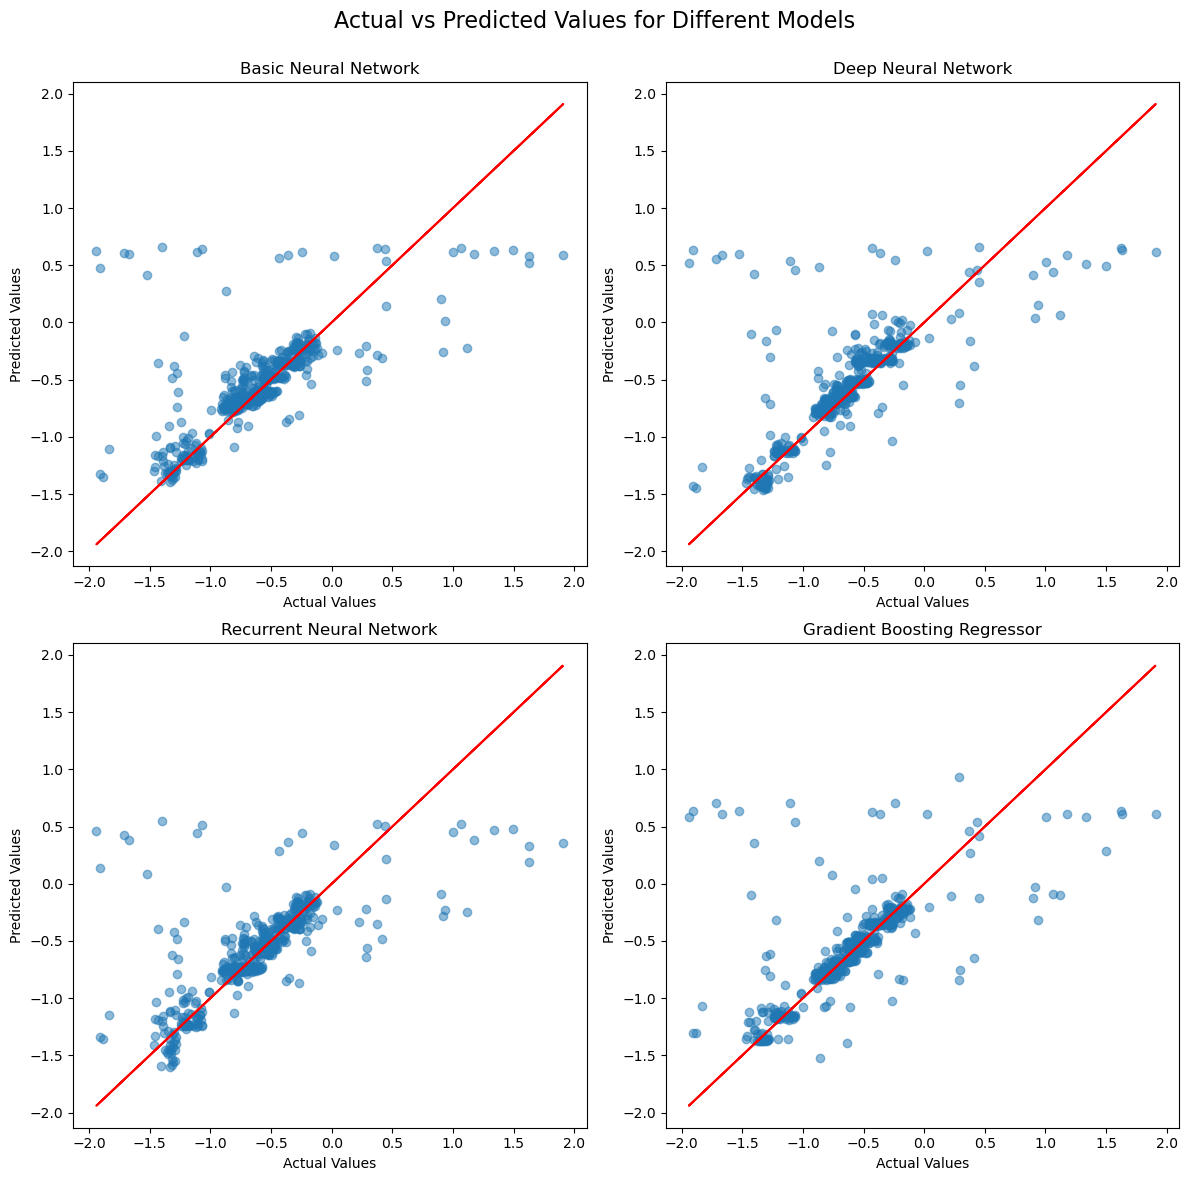

In [7]:
predictions = {
    'Basic Neural Network': y_pred_bnn,
    'Deep Neural Network': y_pred_dnn,
    'Recurrent Neural Network': y_pred_rnn,
    'Gradient Boosting Regressor': y_pred_gbr
}

r2_scores_df = pd.DataFrame({
    'Model': ['Basic Neural Network', 'Deep Neural Network', 'Recurrent Neural Network', 'Gradient Boosting Regressor'],
    'R-squared Score': [r2_bnn, r2_dnn, r2_rnn, r2_gbr]
})

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
fig.suptitle('Actual vs Predicted Values for Different Models', fontsize=16)

axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot(y_test, y_test, color='red')  # Plotting the ideal line
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

In [8]:
r2_scores_df

,Model,R-squared Score
0,Basic Neural Network,0.436305
1,Deep Neural Network,0.441759
2,Recurrent Neural Network,0.472469
3,Gradient Boosting Regressor,0.407631
